In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from utils import *

In [4]:
X = load_data()

In [5]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    #Set K
    K = centroids.shape[0]
    
    #Saves the index of the closest centroid for each example
    idx = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        #Array to hold the distance between X[i] and each centroids[j]
        distance = []
        for j in range(centroids.shape[0]):
                norm_ij = np.linalg.norm(X[i] - centroids[j])
                distance.append(norm_ij)
        
        idx[i] = np.argmin(distance)
        
    return idx

In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m,n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)
        
    return centroids
    
    

In [7]:
def run_kMeans(X, initial_centroids, max_iters = 10, plot_progress = False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [8]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [27]:
original_img = plt.imread('Sample1.jpg')

In [10]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (1368, 1452, 3)


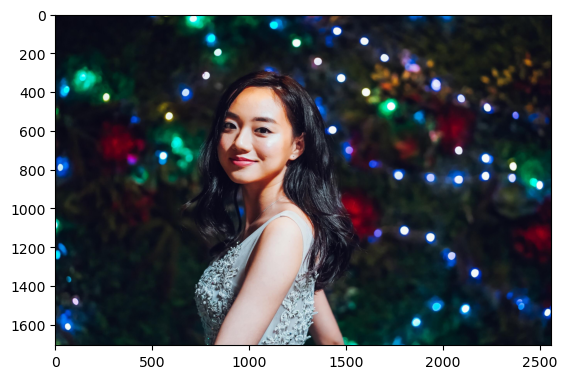

In [28]:
# Visualizing the image
plt.imshow(original_img)

In [29]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [30]:
# Run your K-Means algorithm on this data
K = 16
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [31]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (4369920,)
Closest centroid for the first five elements: [12 12 12 12 12]


AttributeError: 'Axes3D' object has no attribute 'w_yaxis'

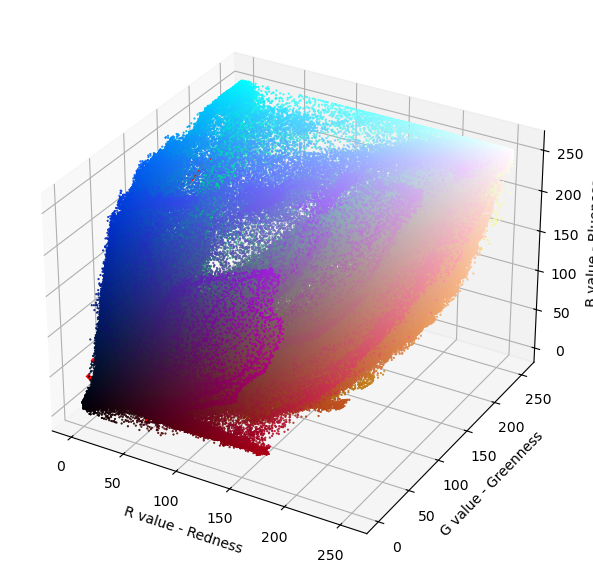

In [32]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

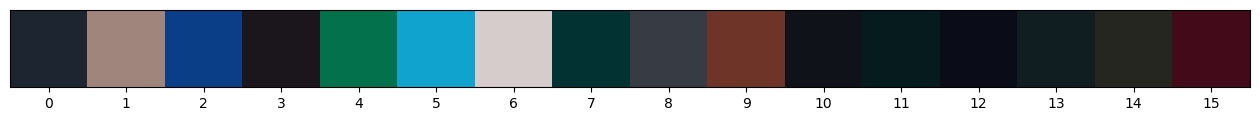

In [33]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

In [34]:
#Find closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)  

#Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

#Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)


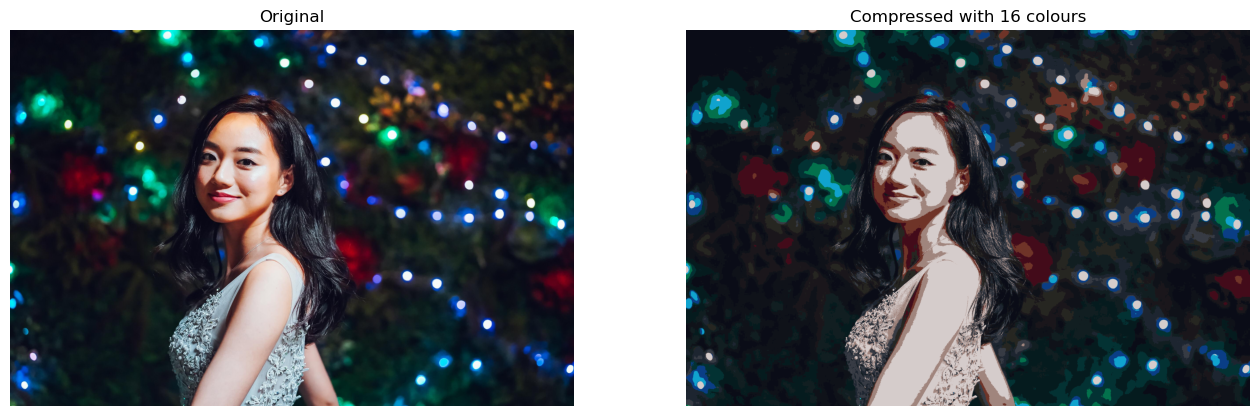

In [35]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()